<a href="https://colab.research.google.com/github/niteen11/lagcc_data_analytics_micro_credential/blob/master/Unit%203%20-%20Python%20Advanced/Mini%20Project/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [3]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.shape

(37806, 5)

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [12]:
# You can query to select the rows given certain condition
ny_df=df.query('state == "New York"')

In [14]:
ny_df = df[df['state']=='New York']

In [15]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [16]:
ny_df.shape

(687, 5)

In [17]:
ny_df.tail()

,date,state,fips,cases,deaths
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876
37672,2022-01-14,New York,36,4408467,61099
37728,2022-01-15,New York,36,4456337,61193
37784,2022-01-16,New York,36,4507601,61259


In [18]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [19]:
#total number of cases
ny_df['cases'].max()

4507601

In [20]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

966973643

Finding new covid 19 cases on daily basis (new cases added everyday)

In [21]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [22]:
ny_df['new_cases'] = newcase

C:\Users\musta\AppData\Local\Temp/ipykernel_18472/2837420997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_df['new_cases'] = newcase


In [23]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [24]:
ny_df['new_cases'].sum()

4507601

In [25]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [26]:
type(ny_new_cases)

pandas.core.series.Series

<AxesSubplot:>

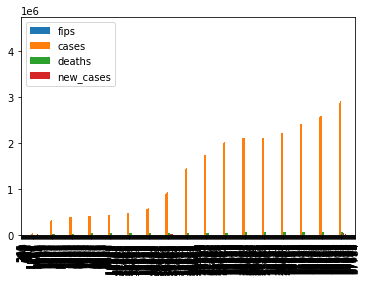

In [27]:
ny_df.plot(kind='bar')

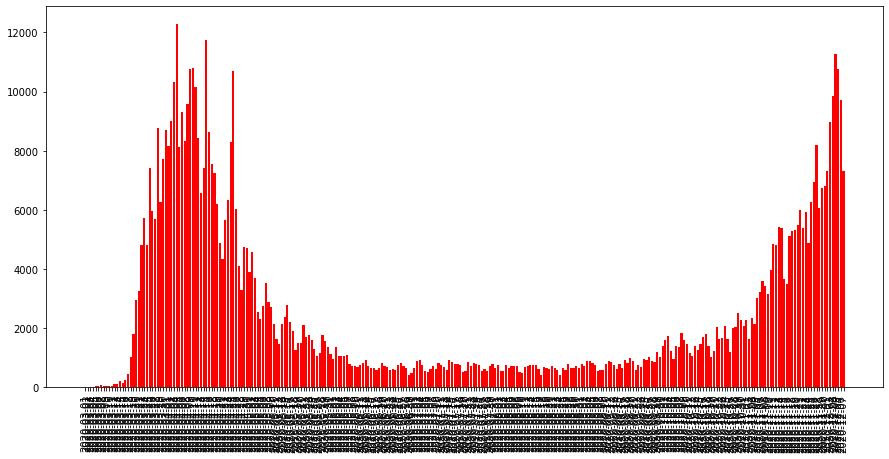

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [28]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

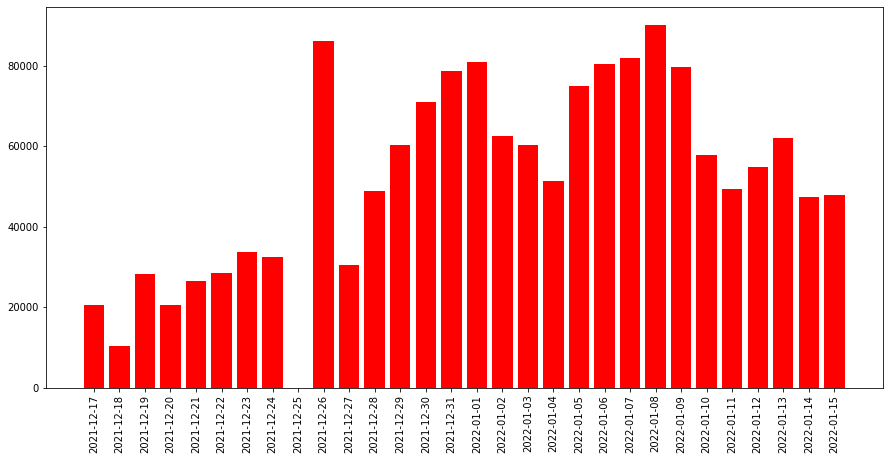

In [29]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

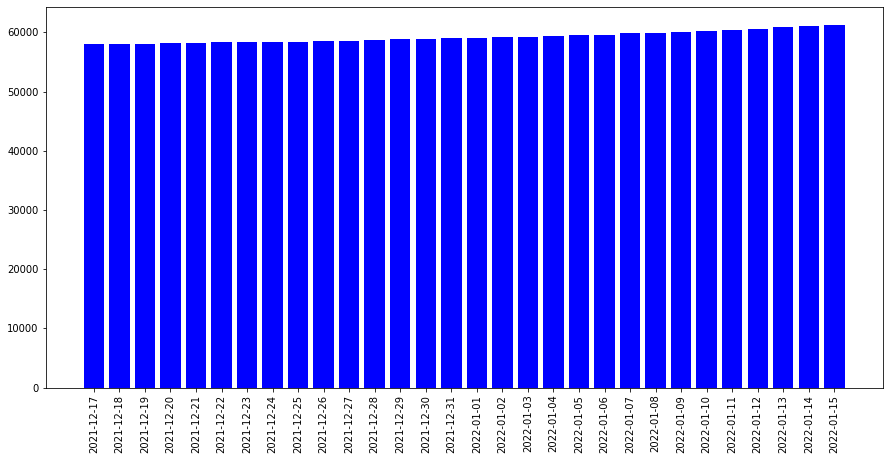

In [30]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [31]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

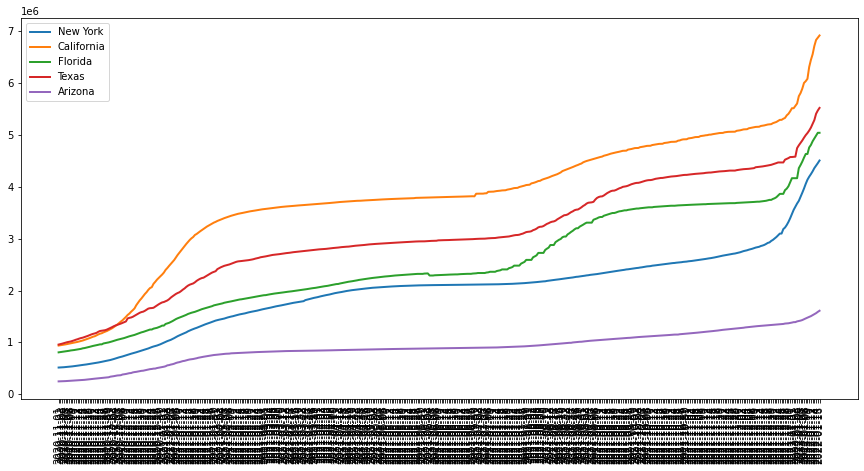

In [32]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Your text here
2.   Conclusion 2
     --Your text here>



# -  Given the graph above, we can safely say that the leading state when it comes to number of Covid19 cases is California, while, Arizona, is where we see the minimum number of cases given the 5 target states. If we go back to California, we may infer that this is the state where people really did not follow the easy and simple principles of safety, such as waring mask. There is no evidence or data given so we can’t include here the fact that if people were vaccinated or not.
# -  Another observation is the increasing of the Covid19 cases across the given 5 states. However, Arizona state has the less rate of Covide19 cases compared to others. 
